# 11. Analysing MD data

As previously discussed, there are many things for which python can be used. One such example is the analysis of Molecular Dynamics (MD) simulations.

There exist several MD analysis libraries, including (but not limited to):
- [MDAnalysis](https://www.mdanalysis.org/)
- [MDTraj](http://mdtraj.org/1.9.3/)
- [PyTraj](https://amber-md.github.io/pytraj/latest/index.html)

In this section, we will look at how we can use the MDAnalysis library to process simulation structures and trajectories. We will also look at how we can interface with the [NGLView](https://amber-md.github.io/pytraj/latest/index.html) to visualise our simulations.

This tutorial will aim to put together all you have learned so far into one final exercise.

## 11.1 The MDAnalysis Universe module

To work with structures and trajectories in MDAnalysis, you must first create an MDAnalysis `Universe`.

This is an object that contains all the necessary information about your system, including atomic coordinates, atom types, box vectors (if available), etc...

A `Universe` is a 'class' object, which stores all the information above your system, including;
- Atomic coordinates (i.e. positions).
- Atom names.
- Atom types.
- Bond information (if available).

.. and so on. Having this information could be very useful if you are trying to measure distances or dihedrals. 

When we load a trajectory (as we will do later in the section), the `Universe` also stores information like the current frame number, etc. 

First we import the MDAnalysis `Universe` module, we will also import `numpy` for later use:

In [22]:
from MDAnalysis import Universe
import numpy

You then load the structure file into a `Universe` instance named `alanine` with:

In [23]:
alanine = Universe('datafiles/ALA.pdb')

/home/mjkikaz2/anaconda3/envs/OxCompBio/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


**Note**: We could have also used `import MDAnalysis`, in which case we would have to use `MDAnalysis.Universe` in place of `Universe`. As previously discussed, the `from ... import ...` syntax allows us to import only a sub-module from a library, rather than the full thing, which can be convenient in various circumstances.

You can check the different properties of your universe using MDAnalysis. The general syntax for this is `universename.attributename`; some properties (attributes) are themselves classes (e.g. `alanine.atoms` groups all the information about our atoms) and will have their own attributes. For example, if you want to check the names of the atoms of your structure, you can type:

In [24]:
alanine.atoms.names

array(['CL', 'HL1', 'HL2', 'HL3', 'CLP', 'OL', 'NL', 'HL', 'CA', 'HA',
       'CB', 'HB1', 'HB2', 'HB3', 'CRP', 'OR', 'NR', 'HR', 'CR', 'HR1',
       'HR2', 'HR3'], dtype=object)

### How would you find the values of the Phi and Psi dihedral angles of alanine dipeptide, in degrees or radians?

Hint: the Phi dihedral is calculated from atoms CLP, NL, CA, and CRP, and the Psi dihedral is calculated using atoms NR, CRP, CA, and NL.

For this we can make use of the built-in functions associated with the Universe class (or 'methods'). We can use `select_atoms(selection)` to isolate a group of atoms that match `selection`; the syntax of the selections strings is generally the same as for VMD (which you may have used in day 1 of this workshop). 

`alanine.select_atoms(selection)` will give us an 'atom group' class instance. We can then use this instance's method `dihedral` to turn four atoms into a 'dihedral' instance, and finally using `value()` on this instance will return the (current) value of that dihedral angle.

In [25]:
print(type(alanine))
print(type(alanine.select_atoms('name CLP NL CA CRP')))
print(type(alanine.select_atoms('name CLP NL CA CRP').dihedral))

phi = alanine.select_atoms('name CLP NL CA CRP').dihedral.value()
psi = alanine.select_atoms('name NR CRP CA NL').dihedral.value()
print('The Phi dihedral is {:.2f} in degrees and {:.2f} in radians'.format(phi, numpy.deg2rad(phi)))
print('The Phi dihedral is {:.2f} in degrees and {:.2f} in radians'.format(psi, numpy.deg2rad(psi)))

<class 'MDAnalysis.core.universe.Universe'>
<class 'MDAnalysis.core.groups.AtomGroup'>
<class 'MDAnalysis.core.topologyobjects.Dihedral'>
The Phi dihedral is 91.26 in degrees and 1.59 in radians
The Phi dihedral is -63.54 in degrees and -1.11 in radians


### How would you plot the change in Phi and Psi over a trajectory?

In order to do this, let's break the process down into small steps.

You will first need to load the trajectory. The format to do this is:

universe_name = Universe(PDBfile, TRJfile)

In this case we have provided you a trajectory in the `datafiles` folder, the PDB file is called 'ALA.pdb' and the TRJ file is called 'ALA.xtc'. So we can call them as `./datafile/ALA.pdb` and `./datafiles/ALA.xtc`.

In [26]:
# Exercise 11.1.1: Create a Universe called 'ala_trajectory' using the PDB file 'ALA.pdb' 
# and the trajectory file 'ALA.xtc'
ala_trajectory = Universe('./datafiles/ALA.pdb', './datafiles/ALA.xtc')

Now that you have a Universe with your trajectory, we can access another feature of the Universe: trajectory data.

First we should look at what the current trajectory frame number is.

The frame number is stored under `universename.trajectory.frame`.

In [27]:
# Exercise 11.1.2: Print the current frame number.
print(ala_trajectory.trajectory.frame)

0


A `Universe.trajectory` acts kind of like a list storing each frame in a simulation and various information about it, so we can loop through it the same way we did for lists above. As we go through each frame, the coordinates of each atom, stored in Universe.atoms, will be updated.

We can therefore quite a quick `for` loop that prints the frame number for each frame in the trajectory.

In [28]:
# When using MDanalysis, we usually refer to each frame as a 'timestep' or 'ts'
# Here at each loop instance, we allocate the current frame to 'ts'
for ts in ala_trajectory.trajectory:
    # the comma at the end here will stop it printing on a new line every time,
    # so this doesn't take up too much space
    print(ts.frame)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


Now, use the same logic as Exercise 11.1 to print the phi and psi dihedral angles at each frame:

In [29]:
# Exercise 11.1.3: Print the frame number and at least one of the dihedrals.
# First create the phi and psi selections
phi_dihedral = ala_trajectory.select_atoms('name CLP NL CA CRP').dihedral
psi_dihedral = ala_trajectory.select_atoms('name NR CRP CA NL').dihedral

# We then loop over the the trajectory
for ts in ala_trajectory.trajectory:
    phi = phi_dihedral.value()
    psi = psi_dihedral.value()
    print(f"Current frame: {ts.frame}, phi: {phi}, psi: {psi}")

Current frame: 0, phi: -8.766534490475896, psi: -58.73139298562282
Current frame: 1, phi: 66.67110533941853, psi: -82.99726052759348
Current frame: 2, phi: 72.27769397309407, psi: -61.16106254186662
Current frame: 3, phi: 67.63512342079548, psi: -85.29689625465237
Current frame: 4, phi: 68.29502868469532, psi: -73.50058631068224
Current frame: 5, phi: 81.61061919284676, psi: -72.99801258127935
Current frame: 6, phi: 63.80126367600781, psi: -76.67121730107941
Current frame: 7, phi: 73.7031980083587, psi: -82.96885733488641
Current frame: 8, phi: 68.45435786829154, psi: -61.284994937809095
Current frame: 9, phi: 78.18880045238366, psi: -74.5025292186495
Current frame: 10, phi: 85.58733234034806, psi: -64.5265927629933
Current frame: 11, phi: 65.4370444358654, psi: -89.6004937366657
Current frame: 12, phi: 67.52156914556127, psi: -65.6270428503506
Current frame: 13, phi: 68.38792357706501, psi: -68.31207207505084
Current frame: 14, phi: 63.563969368355814, psi: -66.57640478564538
Current 


Now that you can access both the frame number and the phi and psi dihedrals, it's time to plot them.

First, we will need to import a plotting library. In this case we import pyplot from matplotlib.

We then create three empty lists (`frames`, `all_phi`, and `all_psi`) to hold our trajectory data.

Then we fill each of those lists with the relevant values.

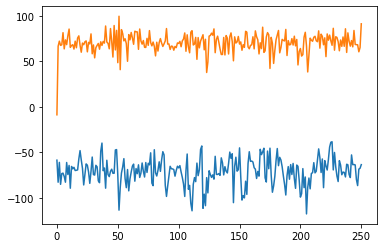

In [30]:
# We declare matplotlib inline to make sure it plots properly
%matplotlib inline
# We need pyplot from matplotlib to plot the dihedrals
from matplotlib import pyplot

# Create three empty lists
frames = []
all_phi = []
all_psi = []

# iterate through the trajectory
for frame in ala_trajectory.trajectory:
    # calculate phi and psi
    phi = ala_trajectory.select_atoms('name CLP or name NL or name CA or name CRP').dihedral.value()
    psi = ala_trajectory.select_atoms('name NR or name CRP or name CA or name NL').dihedral.value()
    # append frame number, phi, and psi to the lists
    frames.append(frame.frame)
    all_phi.append(phi)
    all_psi.append(psi)

# We then plot our data
pyplot.plot(frames, all_psi)
pyplot.plot(frames, all_phi)
pyplot.show()

As shown above, you can use the matplotlib.pyplot module to plot `x` and `y` values in the following manner:

```python
pyplot.plot(x_value, y_value)
```

We then use `pyplot.show()` to make the plot appear.

**Note:** You can adjust your matplotlib pyplot plot using various different options such as; `pyplot.title()`, `pyplot.xlim()`, `pyplot.ylim()`, `pyplot.xlabel()`, and `pyplot.ylabel()`.

For example, `pyplot.title()` will add a title.

Check the `help()` of these functions for more details!

## 11.2 Analysing a protein simulation

In day 1 of this workshop you did some molecular dynamics simulations of a HIV-1 protease protein using gromacs.
Let's now look at how you could use MDAnalysis, and an associated python visulisation library NGLview, to analyse the trajectory you generated.

### Visualising the trajectory using nglview

The nglview library is a python widget for visualising simulation trajectories, achieving a similar task to the VMD program that you will have used on day 1. One of the interesting advantages of nglview is that it interfaces directly with analysis packages such as MDAnalysis and runs within jupyter notebooks.

Let's see how we can use nglview to visualise an MDAnalysis universe object.

First we need to create a universe (let's call it `protein`) from the simulation output files "pre_md.pdb" and "md_cent.xtc" (which are present in the `datafiles` directory, hence will be passed to Universe as `./datafiles/pre_md.pdb` and `./datafiles/md_cent.xtc`).

_Note 1: We have pre-aligned the trajectory to the first frame for you so as to remove any motions related to translation._

_Note 2: When loading the trajectory you will get a warning that MDAnalysis needs to reload offsets, this is normal in this scenario._

In [31]:
# Exercise 11.2.1: Let's load a universe named protein
protein = Universe('./datafiles/pre_md.pdb', './datafiles/md_cent.xtc')

Next let's load nglview and use it's show_mdanalysis function to load the MDAnalysis universe

In [32]:
import nglview
protein_view = nglview.show_mdanalysis(protein)

By default this pre-sets the nglviewer to show the protein in the cartoon representation. Let's add a few options to colour the protein by secondary structure, show water oxygens and change the background colour

In [33]:
# Let's update the cartoon representation to colour the protein by secondary structure
protein_view.update_cartoon(color='sstruc')

# We then add a transparent hyperball representation of the water oxygens 
#(play with the opacity value, see what you get)
protein_view.add_hyperball('SOL and not hydrogen', opacity=0.4)

# Let's change the display a little bit
protein_view.parameters = dict(camera_type='orthographic', clip_dist=0)

# Set the background colour to black
protein_view.background = 'black'

# Call protein_view to visualise the trajectory
protein_view

NGLWidget(background='black', max_frame=100)

The nglview output can be controlled in the following way:

- play / pause button: play the trajectory 
- double click window: enter or exit full screen mode 
- left mouse button: rotate system 
- middle mouse wheel: zoom in/out 
- right mouse button: translate system 


As you can be seen from the trajectory, the HIV-1 protease structure does indeed move, but by how much? In the next section we will see how we can use MDAnalysis to quantify backbone fluctuations.

### Calculating the root-mean-square deviation

In order to gain a quantitative description of how the HIV-1 protease moves in our simulation we can calculate the root-mean-square deviation (RMSD) of the protein backbone.

The RMSD gives us an idea of how 'stable' our protein is when compared to our starting, static, structure. The lower the RMSD is the, more stable we can say our protein is. 

The RMSD as a function of time, $\rho (t)$, can be defined by the following equation:

\begin{equation}
\\
\rho (t) = \sqrt{\frac{1}{N}\sum^N_{i=1}w_i\big(\mathbf{x}_i(t) - \mathbf{x}^{\text{ref}}_i\big)^2}
\end{equation}

Luckily MDAnalysis has its own built-in function to calcualte this, we can import it like we did before.

In [13]:
from MDAnalysis.analysis.rms import RMSD as rmsd

In order to calculate the RMSD for every frame in our trajectory we will need:

- A reference structure
- A universe object
- A selection of atoms

In our case the reference structure will be the HIV-1 protease structure in the first frame.

Our universe object will be the 'protein' object we defined above.

For our selection we will use the backbone atoms.

In [14]:
ref = Universe('datafiles/pre_md.pdb', 'datafiles/md_cent.xtc')

# Set the ref trajectory to the first frame
ref.trajectory[0]

/home/mjkikaz2/anaconda3/envs/OxCompBio/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


< Timestep 0 with unit cell dimensions [70. 70. 70. 90. 90. 90.] >

Due to the way that GROMACS post processes the trajectory file we need to edit it slightly before running our RMSD.

This is done by aligning all frames to the reference structure. 

In [15]:
from MDAnalysis.analysis import align

# Create the MD simulation universe
protein = Universe('datafiles/pre_md.pdb', 'datafiles/md_cent.xtc')
# Call the MDAnalysis align function to align the MD simulation unvierse to the reference (first frame) universe
align_strucs = align.AlignTraj(protein, ref, select="backbone", weights="mass", in_memory=True, verbose=True)

R = align_strucs.run()

You will have noticed that running this function stores it in the variable 'R', we can now access the RMSD values:

In [16]:
rmsd_data = R.rmsd

Really, we'd like to visualise how the RMSD changes over time and this can be done in the same way you did in Excercise 11.1.5.

Take a look at the 'rmsd_data' variable (it's a numpy array) and try plotting it below.

You will need to access 'rmsd_data' (a numpy array) in order to plot both the time and the RMSD as a line plot.


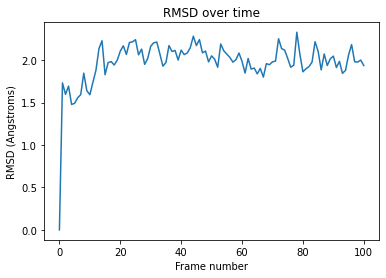

In [17]:
# Excercise 11.2.2: Plot the RMSD data for the HIV-1 protease system. 

# Make sure to add appropriate axis titles.
# What does the RMSD tell you about the protein?
# [If you have time] What happens when you calculate the RMSD using more atoms (i.e. not just the backbone)
pyplot.plot(rmsd_data)
pyplot.title("RMSD over time")
pyplot.xlabel("Frame number")
pyplot.ylabel("RMSD (Angstroms)")
pyplot.show()

### Calculating the root-mean-square fluctuation

To look at how each residue flucuates over it's average postion we can use the closely related measurement of root-mean-square fluctuation (RMSF).

The RMSF for an atom, $\rho_i$, is given by:

\begin{equation}
\rho_i = \sqrt{\sum^N_{i=1} \big\langle(\mathbf{x}_i - \langle \mathbf{x}_i \rangle )^2 \big\rangle }
\end{equation}

In [18]:
from MDAnalysis.analysis.rms import RMSF as rmsf

In [19]:
# Reset the trajectory to the first frame
protein.trajectory[0]

# We will need to select the alpha Carbons only
calphas = protein.select_atoms("name CA")
rmsf_calc = rmsf(calphas, verbose=True).run()

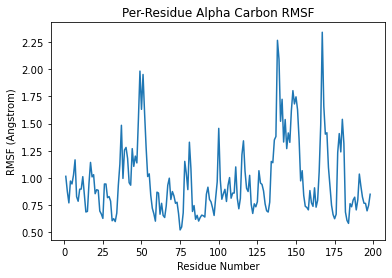

In [20]:
# Excercise 11.2.3: Plot the RMSF data for the HIV-1 protease system. 
    # Tip, in order to plot the resids you will need to access them through the rmsf_calc object

# Make sure to add appropriate axis titles.
# What parts of the protein have a high RMSF, can you locate these on the protein structure?
# [If you have time] What happens when you calculate the RMSF using more atoms (i.e. not just the backbone)
pyplot.plot(calphas.resids, rmsf_calc.rmsf)
pyplot.title("Per-Residue Alpha Carbon RMSF")
pyplot.xlabel("Residue Number")
pyplot.ylabel("RMSF (Angstrom)")
pyplot.show()